# Calculate ${\rm SFH}(t)$ for a population of Diffstar galaxies

This notebook shows how to use the Diffstar source code to calculate ${\rm SFH}(t)$ for a large galaxy population. 

### Create some fake data

This is just for demo purposes - the values of mah_params, u_ms_params and u_q_params are all part of the Diffsky mocks

#### Fake MAH params

In [11]:
from diffmah.individual_halo_assembly import DEFAULT_MAH_PARAMS
import numpy as np
import matplotlib.pyplot as plt

n_gals = 200
zz = np.zeros(n_gals)

mah_lgm0 = np.random.uniform(11, 15, n_gals)
mah_logtc = 0.1 + np.random.uniform(-0.1, 0.1, n_gals)
mah_early = 2.0 + np.random.uniform(-0.1, 0.1, n_gals)
mah_late = mah_early - np.random.uniform(0.5, 1, n_gals)

mah_params = np.vstack((mah_lgm0, mah_logtc, mah_early, mah_late)).T

#### Fake main sequence SFH params

In [12]:
from diffstar.stars import DEFAULT_SFR_PARAMS

ms_u_params = np.vstack([zz+val for val in DEFAULT_SFR_PARAMS.values()]).T
ms_u_params = np.random.normal(loc=ms_u_params, scale=0.1)

#### Fake quenching params

In [13]:
from diffstar.quenching import DEFAULT_Q_PARAMS

q_u_params = np.vstack([zz+val for val in DEFAULT_Q_PARAMS.values()]).T
q_u_params = np.random.normal(loc=q_u_params, scale=0.1)

### Build the JAX kernel and compute the SFHs

In this calculation there is a natural tradeoff between performance in memory and compute cycles. Different options for input kwargs `tobs_loop` and `galpop_loop` have different performance on CPUs/GPUs.

In [14]:
from diffstar.sfh import get_sfh_from_mah_kern

get_sfh_from_mah = get_sfh_from_mah_kern(tobs_loop='vmap', galpop_loop='vmap')

In [15]:
tarr = np.linspace(0.1, 13.8, 100)

sfh_galpop = get_sfh_from_mah(tarr, mah_params, ms_u_params, q_u_params)
print(sfh_galpop.shape)

(200, 100)


### Plot a few example SFHs from our randomly generated sample

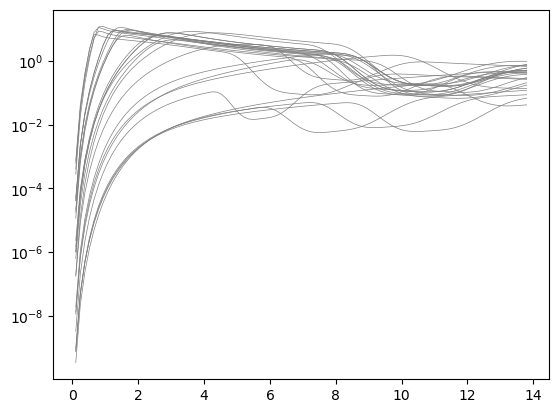

In [16]:
fig, ax = plt.subplots(1, 1)

yscale = ax.set_yscale('log')
for __ in range(25):
    iplot = np.random.randint(0, sfh_galpop.shape[0])
    __=ax.plot(tarr, sfh_galpop[iplot, :], lw=0.5, color='gray')